In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr

wr.filterwarnings('ignore')

df = pd.read_csv('Road Accident Data.csv')

In [2]:
df.shape

(307973, 23)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Month                       307973 non-null  object 
 3   Day_of_Week                 307973 non-null  object 
 4   Year                        307973 non-null  int64  
 5   Junction_Control            307973 non-null  object 
 6   Junction_Detail             307973 non-null  object 
 7   Accident_Severity           307973 non-null  object 
 8   Latitude                    307973 non-null  float64
 9   Light_Conditions            307973 non-null  object 
 10  Local_Authority_(District)  307973 non-null  object 
 11  Carriageway_Hazards         5424 non-null    object 
 12  Longitude                   307973 non-null  float64
 13  Number_of_Casu

In [18]:
df.head()

,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Jan,Monday,2021,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Jan,Sunday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Jan,Monday,2021,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Jan,Tuesday,2021,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [4]:
df.describe()

,Year,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,2021.468934,52.487005,-1.368884,1.356882,1.829063,38.866037
std,0.499035,1.339011,1.356092,0.815857,0.710477,14.032933
min,2021.000000,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,2021.000000,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,2021.000000,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,2022.000000,53.415517,-0.206810,1.000000,2.000000,50.000000
max,2022.000000,60.598055,1.759398,48.000000,32.000000,70.000000


In [5]:
df.isnull().sum()

Accident_Index                     0
Accident Date                      0
Month                              0
Day_of_Week                        0
Year                               0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

In [19]:
df["Carriageway_Hazards"].fillna("No Hazards", inplace = True) 
df["Road_Surface_Conditions"].fillna("Unknown", inplace = True) 
df["Road_Type"].fillna("Unknown", inplace = True) 
df["Time"].fillna("Unknown", inplace = True) 
df["Weather_Conditions"].fillna("Unknown", inplace = True) 
df.isnull().sum()


Accident_Index                0
Accident Date                 0
Month                         0
Day_of_Week                   0
Year                          0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Carriageway_Hazards           0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64

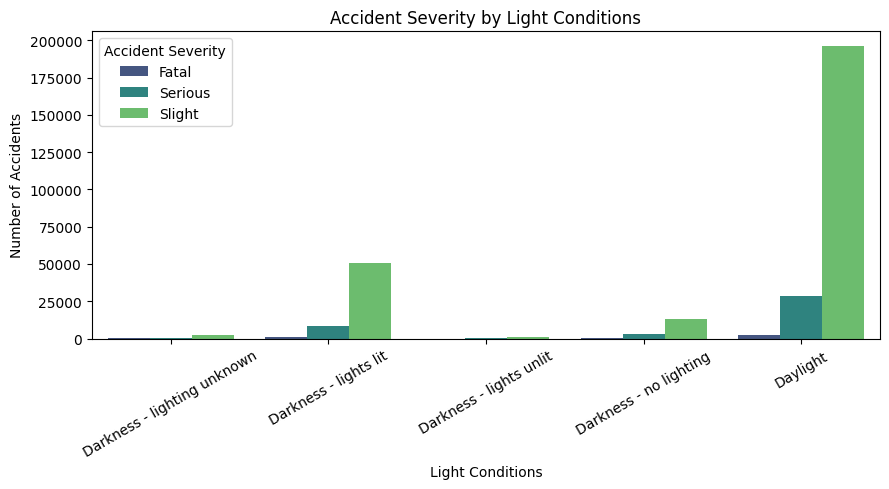

In [7]:
light_severity = df.groupby(['Light_Conditions', 'Accident_Severity']).size().reset_index(name='Count')

plt.figure(figsize=(9, 5))

sns.barplot(x='Light_Conditions', y='Count', hue='Accident_Severity', data=light_severity, palette='viridis')
plt.title("Accident Severity by Light Conditions")
plt.xlabel("Light Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=30)
plt.legend(title="Accident Severity")

plt.tight_layout()
plt.show()


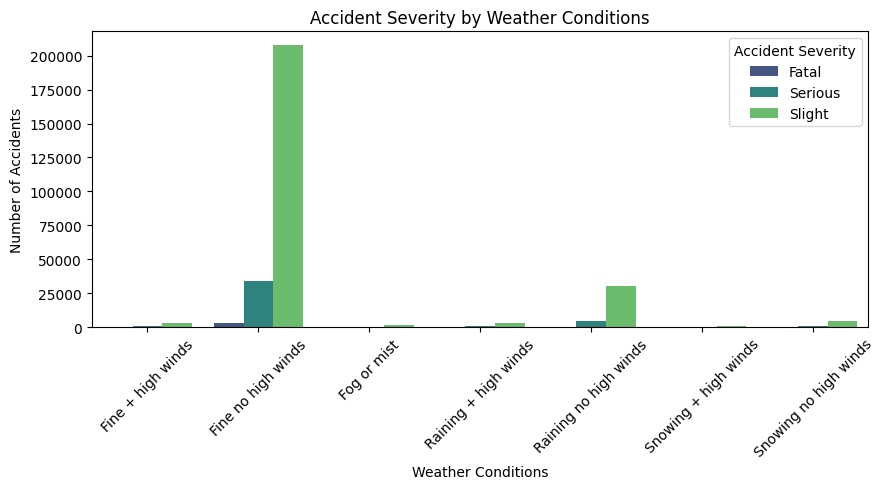

In [8]:
weather_severity = df.groupby(['Weather_Conditions', 'Accident_Severity']).size().reset_index(name='Count')
weather_severity_filtered = weather_severity[~weather_severity['Weather_Conditions'].isin(['Other', 'Unknown'])]

plt.figure(figsize=(9, 5))
sns.barplot(x='Weather_Conditions', y='Count', hue='Accident_Severity', data=weather_severity_filtered, palette='viridis')
plt.title("Accident Severity by Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.legend(title="Accident Severity")
plt.tight_layout()
plt.show()

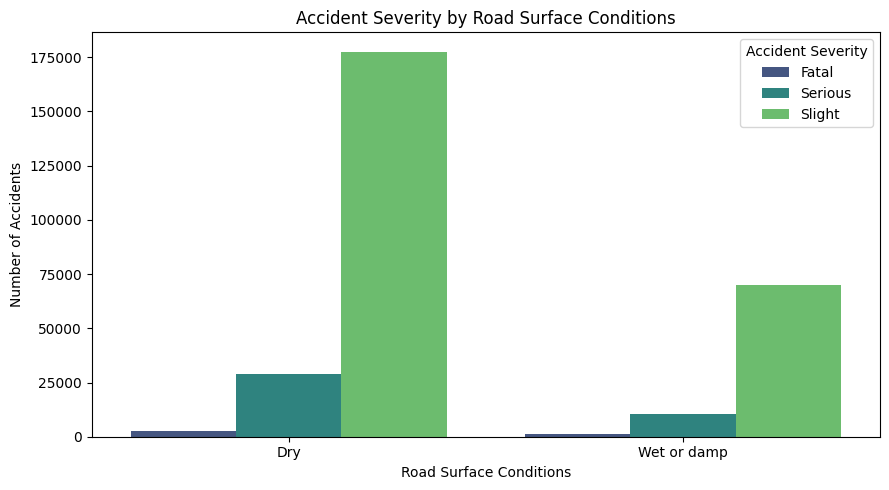

In [9]:
road_severity = df.groupby(['Road_Surface_Conditions', 'Accident_Severity']).size().reset_index(name='Count')
road_severity = road_severity[road_severity['Road_Surface_Conditions'].isin(['Dry', 'Wet or damp'])]

plt.figure(figsize=(9, 5))
sns.barplot(x='Road_Surface_Conditions', y='Count', hue='Accident_Severity', data=road_severity, palette='viridis')
plt.title("Accident Severity by Road Surface Conditions")
plt.xlabel("Road Surface Conditions")
plt.ylabel("Number of Accidents")
plt.legend(title="Accident Severity")
plt.tight_layout()
plt.show()


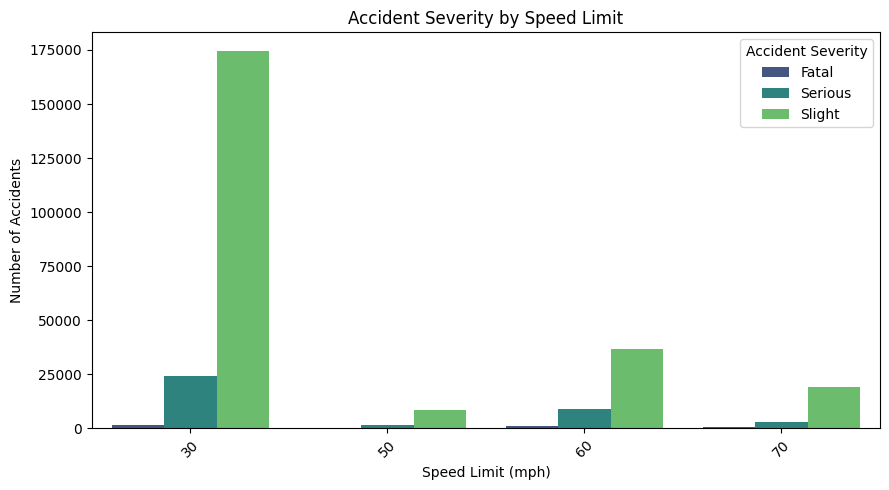

In [10]:
speed_severity = df.groupby(['Speed_limit', 'Accident_Severity']).size().reset_index(name='Count')
speed_severity = speed_severity[speed_severity['Speed_limit'].isin([30, 50, 60, 70])]

plt.figure(figsize=(9, 5))
sns.barplot(x='Speed_limit', y='Count', hue='Accident_Severity', data=speed_severity, palette='viridis')
plt.title("Accident Severity by Speed Limit")
plt.xlabel("Speed Limit (mph)")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.legend(title="Accident Severity")
plt.tight_layout()
plt.show()


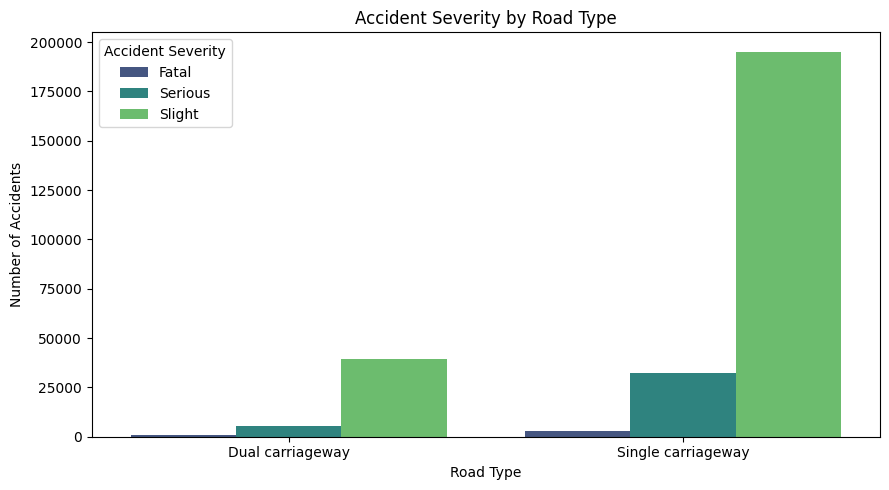

In [11]:
road_type_severity = df.groupby(['Road_Type', 'Accident_Severity']).size().reset_index(name='Count')
road_type_severity = road_type_severity[road_type_severity['Road_Type'].isin(['Single carriageway', 'Dual carriageway', 'Motorway'])]

plt.figure(figsize=(9, 5))
sns.barplot(x='Road_Type', y='Count', hue='Accident_Severity', data=road_type_severity, palette='viridis')
plt.title("Accident Severity by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")

plt.legend(title="Accident Severity")
plt.tight_layout()
plt.show()

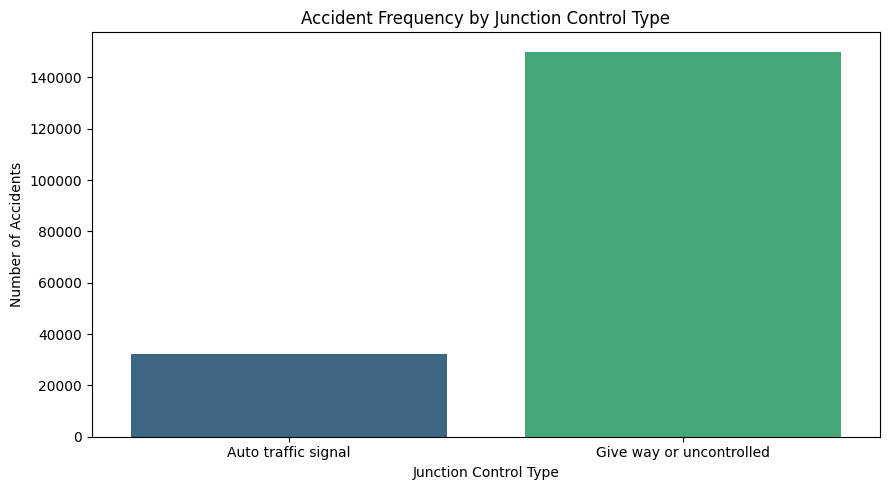

In [12]:
junction_severity = df.groupby(['Junction_Control']).size().reset_index(name='Accident_Count')
junction_severity = junction_severity[junction_severity['Junction_Control'].isin(['Give way or uncontrolled', 'Auto traffic signal'])]

plt.figure(figsize=(9, 5))
sns.barplot(x='Junction_Control', y='Accident_Count', data=junction_severity, palette='viridis')
plt.title("Accident Frequency by Junction Control Type")
plt.xlabel("Junction Control Type")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

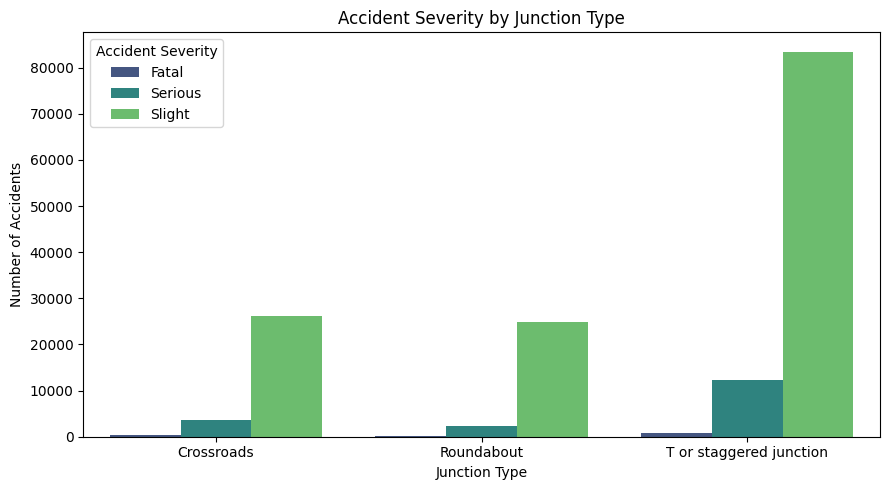

In [13]:
junction_type_severity = df.groupby(['Junction_Detail', 'Accident_Severity']).size().reset_index(name='Count')
junction_type_severity = junction_type_severity[junction_type_severity['Junction_Detail'].isin(['T or staggered junction', 'Crossroads', 'Roundabout'])]

plt.figure(figsize=(9, 5))
sns.barplot(x='Junction_Detail', y='Count', hue='Accident_Severity', data=junction_type_severity, palette='viridis')
plt.title("Accident Severity by Junction Type")
plt.xlabel("Junction Type")
plt.ylabel("Number of Accidents")
plt.legend(title="Accident Severity")
plt.tight_layout()
plt.show()

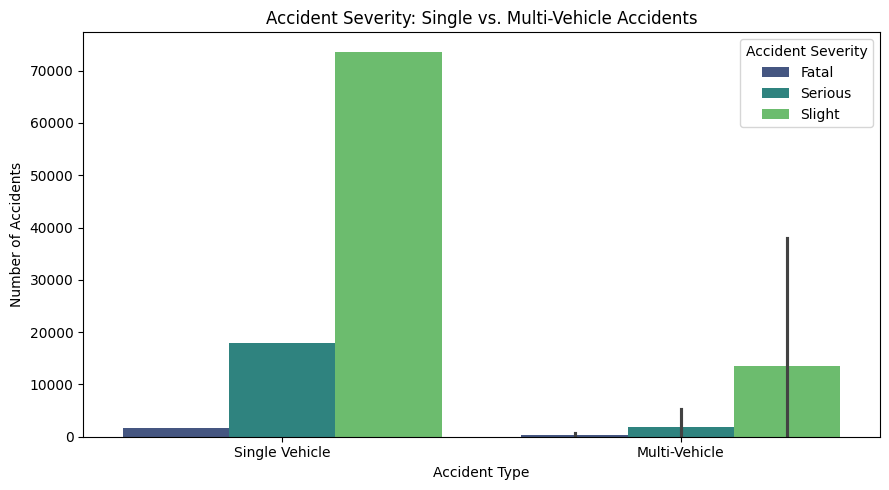

In [14]:
vehicle_accident_severity = df.groupby(['Number_of_Vehicles', 'Accident_Severity']).size().reset_index(name='Count')
vehicle_accident_severity['Vehicle_Category'] = vehicle_accident_severity['Number_of_Vehicles'].apply(lambda x: 'Single Vehicle' if x == 1 else 'Multi-Vehicle')

plt.figure(figsize=(9, 5))
sns.barplot(x='Vehicle_Category', y='Count', hue='Accident_Severity', data=vehicle_accident_severity, palette='viridis')
plt.title("Accident Severity: Single vs. Multi-Vehicle Accidents")
plt.xlabel("Accident Type")
plt.ylabel("Number of Accidents")
plt.legend(title="Accident Severity")
plt.tight_layout()
plt.show()

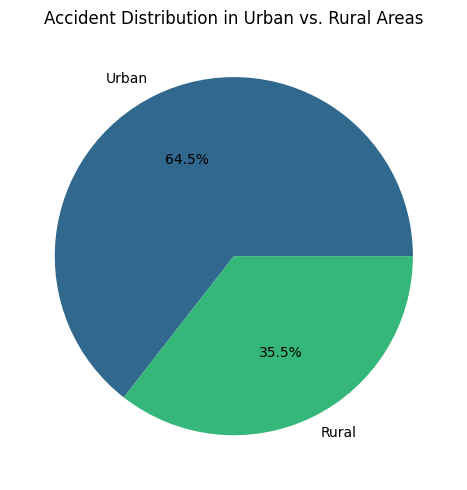

In [15]:
rural_urban_counts = df['Urban_or_Rural_Area'].value_counts()

plt.figure(figsize=(9, 5))
rural_urban_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis', len(rural_urban_counts)))
plt.title("Accident Distribution in Urban vs. Rural Areas")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [16]:
unique_values = df['Road_Type'].unique()
print(unique_values)

['One way street' 'Single carriageway' 'Dual carriageway' 'Roundabout'
 'Slip road' 'Unknown']


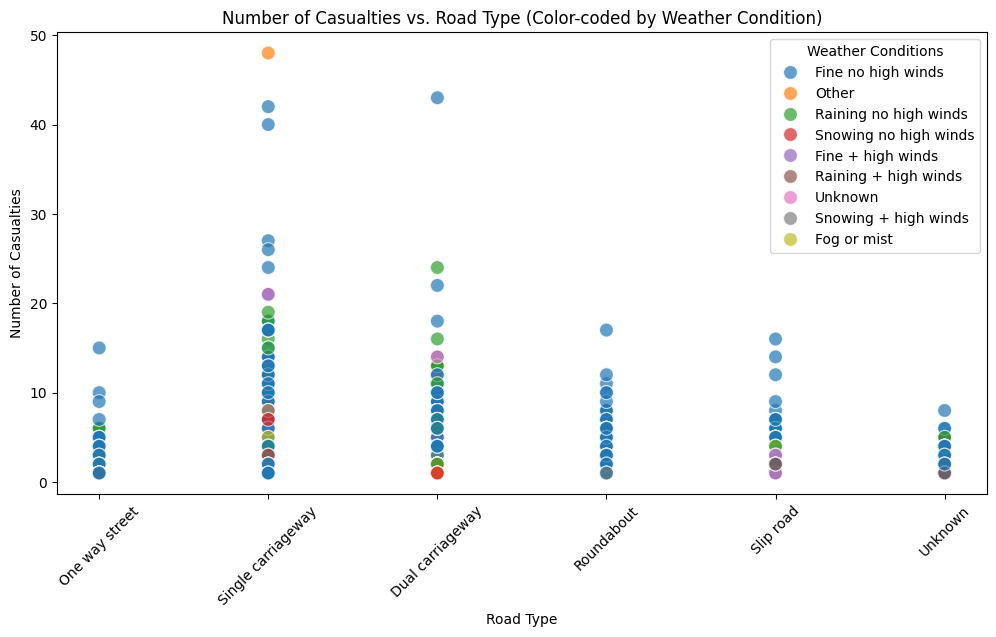

In [17]:
plt.figure(figsize=(12, 6))

# Create the scatter plot
sns.scatterplot(x="Road_Type", y="Number_of_Casualties", hue="Weather_Conditions", data=df, s=100, alpha=0.7)

# Customize the plot
plt.title("Number of Casualties vs. Road Type (Color-coded by Weather Condition)")
plt.xlabel("Road Type")
plt.ylabel("Number of Casualties")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title="Weather Conditions", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()
